### Import libraries

In [1]:
from os import environ
environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Deactive warnings about building from source

from scipy.misc import imread, imresize
from datetime import datetime
from os.path import exists
from shutil import rmtree
from os import makedirs
import tensorflow as tf
from glob import glob
import numpy as np

from models import two_layer_convnet
from pymvtest import classification

import matplotlib.pyplot as plt
%matplotlib inline

### Define a master dictionary

In [2]:
TF = {
      'batch_size':32,
      'graph':None,
      'image_size':200, # Resize full images to this size
      'patch_size':20,  # We'll be changing these later
      'input_channels':1,
      'learning_rate':0.001,
      'n_classes':2,
      'output_channels':[16, 8, 32],
      'filter_size':[3, 5],
      'seed':3,
      'split_fraction':0.7,
      'summary_train':[],
      'training_steps':10001,
      'test_id':'pending',
}
print('Training for {} iterations.'.format(TF['training_steps']))
print('{} units per batch.'.format(TF['batch_size']))

Training for 10001 iterations.
32 units per batch.


### Import the data

Importing data...
Data imported and resized.


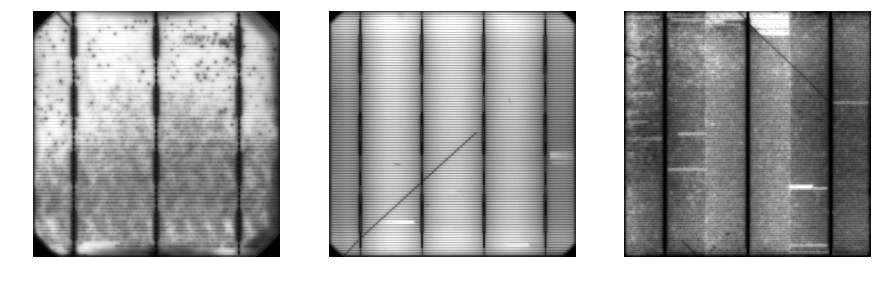

In [3]:
print('Importing data...')

# Whiten on import
images = np.array([np.expand_dims((imread(fp).astype(np.float32) - 128)/255, axis = -1)
                  for fp in glob('./data/resized-images/*.png')])
masks  = np.array([imread(fp)/255 for fp in glob('./data/masked-images/*.png')])

# Extract three images for testing, use the test for training/validation
query_ix      = np.array([(i == 4 or i == 14 or i == 38) for i in range(0, images.shape[0])])
train_ix      = np.logical_not(query_ix)
query_images  = images[query_ix, :, :, :]
query_masks   = masks[query_ix, :, :]
images        = images[train_ix, :, :, :]
masks         = masks[train_ix, :, :]

print('Data imported and resized.')

f, axs = plt.subplots(1, 3, figsize = (15, 5))
for i, ax in enumerate(axs):
    ax.imshow(query_images[i, :, :, 0], cmap = 'gray')
    ax.axis('off');

### Fit the model at each patch + image size, then save the test predictions as images

Training dataset dimensions: (39, 50, 50, 1)
Validation dataset dimensions: (10, 50, 50, 1)

Fitting model...
(Step   0  ) Validation accuracy:    0.50

(Step  500 ) Minibatch accuracy:     0.50
(Step  500 ) Minibatch loss:       0.6980
(Step  500 ) Validation accuracy:    0.52

(Step 1000 ) Minibatch accuracy:     0.50
(Step 1000 ) Minibatch loss:       0.6851
(Step 1000 ) Validation accuracy:    0.49

(Step 1500 ) Minibatch accuracy:     0.53
(Step 1500 ) Minibatch loss:       0.6893
(Step 1500 ) Validation accuracy:    0.49

(Step 2000 ) Minibatch accuracy:     0.56
(Step 2000 ) Minibatch loss:       0.6846
(Step 2000 ) Validation accuracy:    0.48

(Step 2500 ) Minibatch accuracy:     0.47
(Step 2500 ) Minibatch loss:       0.6872
(Step 2500 ) Validation accuracy:    0.48

(Step 3000 ) Minibatch accuracy:     0.59
(Step 3000 ) Minibatch loss:       0.6810
(Step 3000 ) Validation accuracy:    0.48

(Step 3500 ) Minibatch accuracy:     0.53
(Step 3500 ) Minibatch loss:       0.6848
(

Training dataset dimensions: (39, 200, 200, 1)
Validation dataset dimensions: (10, 200, 200, 1)

Fitting model...
(Step   0  ) Validation accuracy:    0.50

(Step  500 ) Minibatch accuracy:     0.59
(Step  500 ) Minibatch loss:       0.6919
(Step  500 ) Validation accuracy:    0.56

(Step 1000 ) Minibatch accuracy:     0.50
(Step 1000 ) Minibatch loss:       0.6892
(Step 1000 ) Validation accuracy:    0.59

(Step 1500 ) Minibatch accuracy:     0.56
(Step 1500 ) Minibatch loss:       0.6851
(Step 1500 ) Validation accuracy:    0.58

(Step 2000 ) Minibatch accuracy:     0.59
(Step 2000 ) Minibatch loss:       0.6846
(Step 2000 ) Validation accuracy:    0.60

(Step 2500 ) Minibatch accuracy:     0.62
(Step 2500 ) Minibatch loss:       0.6287
(Step 2500 ) Validation accuracy:    0.70

(Step 3000 ) Minibatch accuracy:     0.62
(Step 3000 ) Minibatch loss:       0.6619
(Step 3000 ) Validation accuracy:    0.71

(Step 3500 ) Minibatch accuracy:     0.72
(Step 3500 ) Minibatch loss:       0.57

Training dataset dimensions: (39, 150, 150, 1)
Validation dataset dimensions: (10, 150, 150, 1)

Fitting model...
(Step   0  ) Validation accuracy:    0.49

(Step  500 ) Minibatch accuracy:     0.88
(Step  500 ) Minibatch loss:       0.5231
(Step  500 ) Validation accuracy:    0.75

(Step 1000 ) Minibatch accuracy:     0.88
(Step 1000 ) Minibatch loss:       0.3374
(Step 1000 ) Validation accuracy:    0.81

(Step 1500 ) Minibatch accuracy:     0.88
(Step 1500 ) Minibatch loss:       0.2862
(Step 1500 ) Validation accuracy:    0.85

(Step 2000 ) Minibatch accuracy:     0.84
(Step 2000 ) Minibatch loss:       0.3759
(Step 2000 ) Validation accuracy:    0.81

(Step 2500 ) Minibatch accuracy:     0.84
(Step 2500 ) Minibatch loss:       0.2962
(Step 2500 ) Validation accuracy:    0.85

(Step 3000 ) Minibatch accuracy:     0.88
(Step 3000 ) Minibatch loss:       0.1960
(Step 3000 ) Validation accuracy:    0.85

(Step 3500 ) Minibatch accuracy:     0.88
(Step 3500 ) Minibatch loss:       0.34

Training dataset dimensions: (39, 100, 100, 1)
Validation dataset dimensions: (10, 100, 100, 1)

Fitting model...
(Step   0  ) Validation accuracy:    0.50

(Step  500 ) Minibatch accuracy:     0.56
(Step  500 ) Minibatch loss:       0.6860
(Step  500 ) Validation accuracy:    0.53

(Step 1000 ) Minibatch accuracy:     0.62
(Step 1000 ) Minibatch loss:       0.6649
(Step 1000 ) Validation accuracy:    0.55

(Step 1500 ) Minibatch accuracy:     0.59
(Step 1500 ) Minibatch loss:       0.7164
(Step 1500 ) Validation accuracy:    0.69

(Step 2000 ) Minibatch accuracy:     0.81
(Step 2000 ) Minibatch loss:       0.5565
(Step 2000 ) Validation accuracy:    0.49

(Step 2500 ) Minibatch accuracy:     0.62
(Step 2500 ) Minibatch loss:       0.5346
(Step 2500 ) Validation accuracy:    0.65

(Step 3000 ) Minibatch accuracy:     0.66
(Step 3000 ) Minibatch loss:       0.6700
(Step 3000 ) Validation accuracy:    0.68

(Step 3500 ) Minibatch accuracy:     0.75
(Step 3500 ) Minibatch loss:       0.57

Training dataset dimensions: (39, 50, 50, 1)
Validation dataset dimensions: (10, 50, 50, 1)

Fitting model...
(Step   0  ) Validation accuracy:    0.49

(Step  500 ) Minibatch accuracy:     0.56
(Step  500 ) Minibatch loss:       0.7138
(Step  500 ) Validation accuracy:    0.62

(Step 1000 ) Minibatch accuracy:     0.53
(Step 1000 ) Minibatch loss:       0.6116
(Step 1000 ) Validation accuracy:    0.63

(Step 1500 ) Minibatch accuracy:     0.59
(Step 1500 ) Minibatch loss:       0.5165
(Step 1500 ) Validation accuracy:    0.62

(Step 2000 ) Minibatch accuracy:     0.69
(Step 2000 ) Minibatch loss:       0.5166
(Step 2000 ) Validation accuracy:    0.71

(Step 2500 ) Minibatch accuracy:     0.62
(Step 2500 ) Minibatch loss:       0.6519
(Step 2500 ) Validation accuracy:    0.72

(Step 3000 ) Minibatch accuracy:     0.75
(Step 3000 ) Minibatch loss:       0.4538
(Step 3000 ) Validation accuracy:    0.69

(Step 3500 ) Minibatch accuracy:     0.75
(Step 3500 ) Minibatch loss:       0.4722
(

Training dataset dimensions: (39, 200, 200, 1)
Validation dataset dimensions: (10, 200, 200, 1)

Fitting model...
(Step   0  ) Validation accuracy:    0.48

(Step  500 ) Minibatch accuracy:     0.88
(Step  500 ) Minibatch loss:       0.4395
(Step  500 ) Validation accuracy:    0.63

(Step 1000 ) Minibatch accuracy:     0.97
(Step 1000 ) Minibatch loss:       0.2435
(Step 1000 ) Validation accuracy:    0.80

(Step 1500 ) Minibatch accuracy:     0.91
(Step 1500 ) Minibatch loss:       0.1896
(Step 1500 ) Validation accuracy:    0.76

(Step 2000 ) Minibatch accuracy:     0.91
(Step 2000 ) Minibatch loss:       0.3973
(Step 2000 ) Validation accuracy:    0.82

(Step 2500 ) Minibatch accuracy:     0.94
(Step 2500 ) Minibatch loss:       0.1680
(Step 2500 ) Validation accuracy:    0.78

(Step 3000 ) Minibatch accuracy:     0.94
(Step 3000 ) Minibatch loss:       0.1994
(Step 3000 ) Validation accuracy:    0.85

(Step 3500 ) Minibatch accuracy:     0.97
(Step 3500 ) Minibatch loss:       0.17

Training dataset dimensions: (39, 150, 150, 1)
Validation dataset dimensions: (10, 150, 150, 1)

Fitting model...
(Step   0  ) Validation accuracy:    0.44

(Step  500 ) Minibatch accuracy:     0.59
(Step  500 ) Minibatch loss:       0.6809
(Step  500 ) Validation accuracy:    0.52

(Step 1000 ) Minibatch accuracy:     0.66
(Step 1000 ) Minibatch loss:       0.6625
(Step 1000 ) Validation accuracy:    0.52

(Step 1500 ) Minibatch accuracy:     0.75
(Step 1500 ) Minibatch loss:       0.5905
(Step 1500 ) Validation accuracy:    0.51

(Step 2000 ) Minibatch accuracy:     0.66
(Step 2000 ) Minibatch loss:       0.5535
(Step 2000 ) Validation accuracy:    0.68

(Step 2500 ) Minibatch accuracy:     0.75
(Step 2500 ) Minibatch loss:       0.4093
(Step 2500 ) Validation accuracy:    0.74

(Step 3000 ) Minibatch accuracy:     0.91
(Step 3000 ) Minibatch loss:       0.1828
(Step 3000 ) Validation accuracy:    0.80

(Step 3500 ) Minibatch accuracy:     1.00
(Step 3500 ) Minibatch loss:       0.07

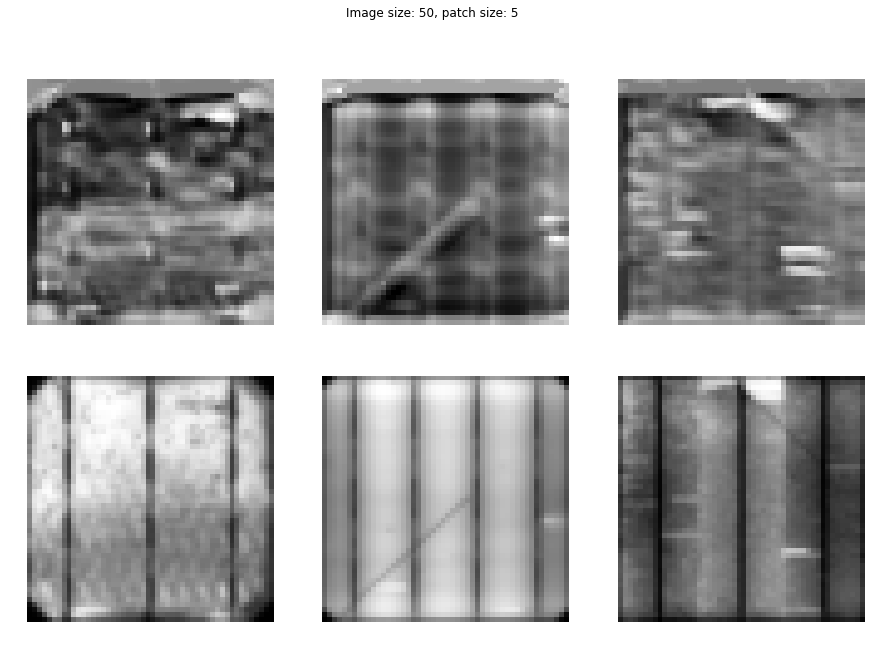

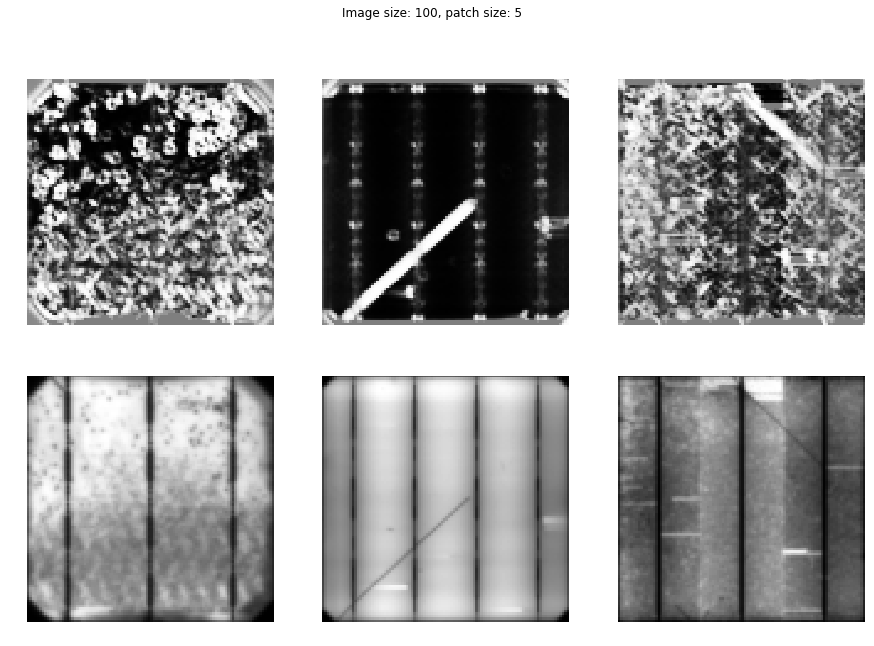

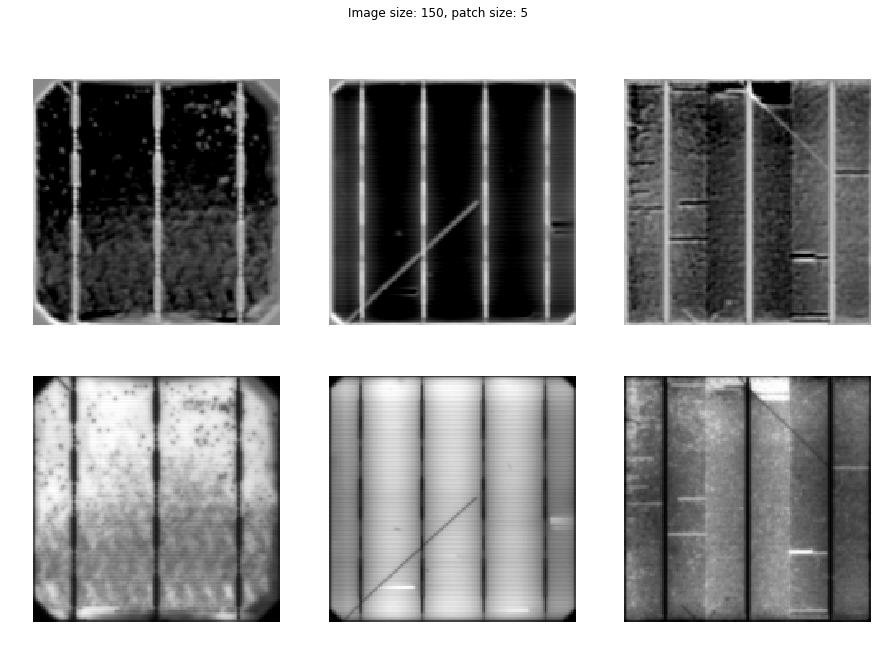

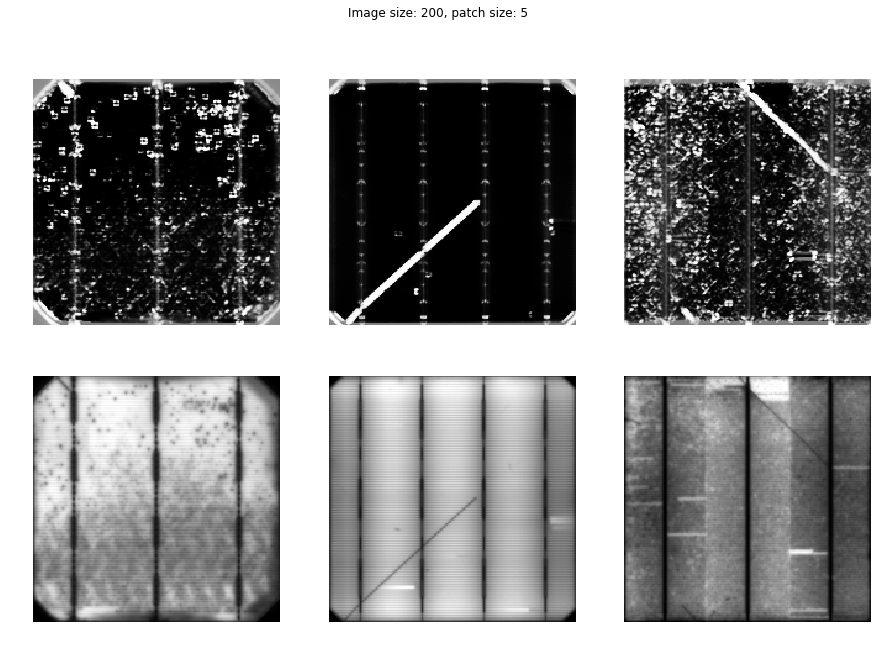

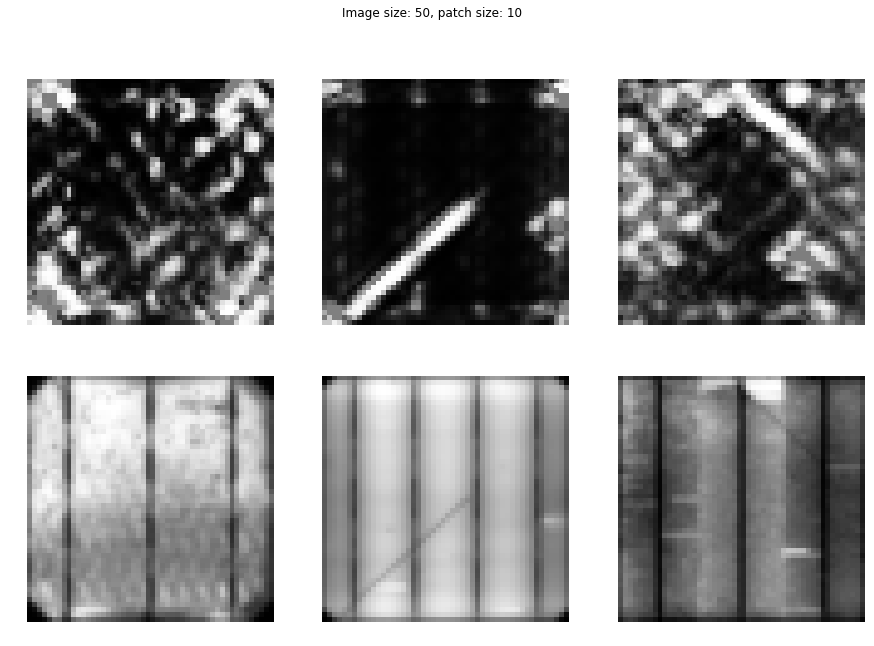

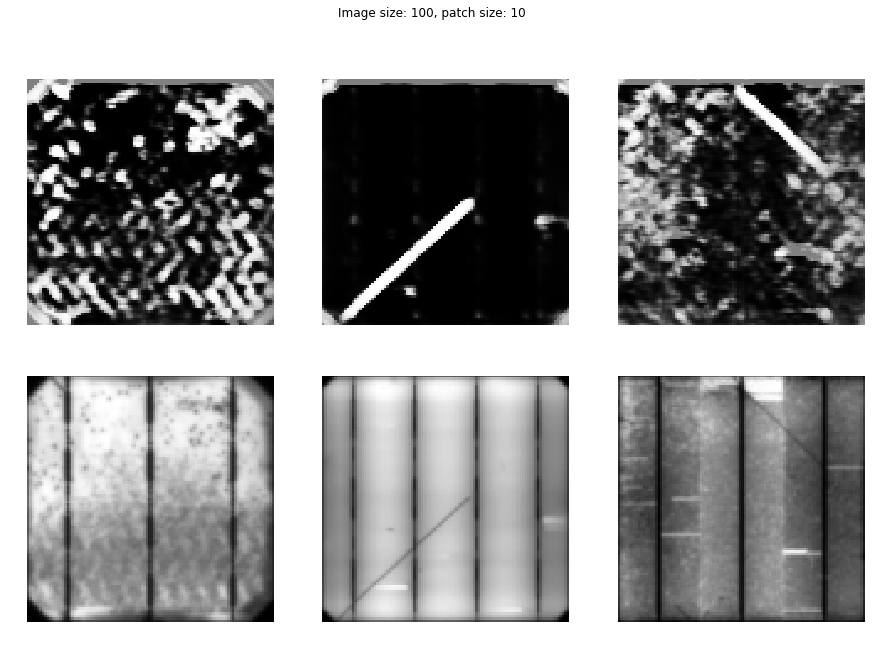

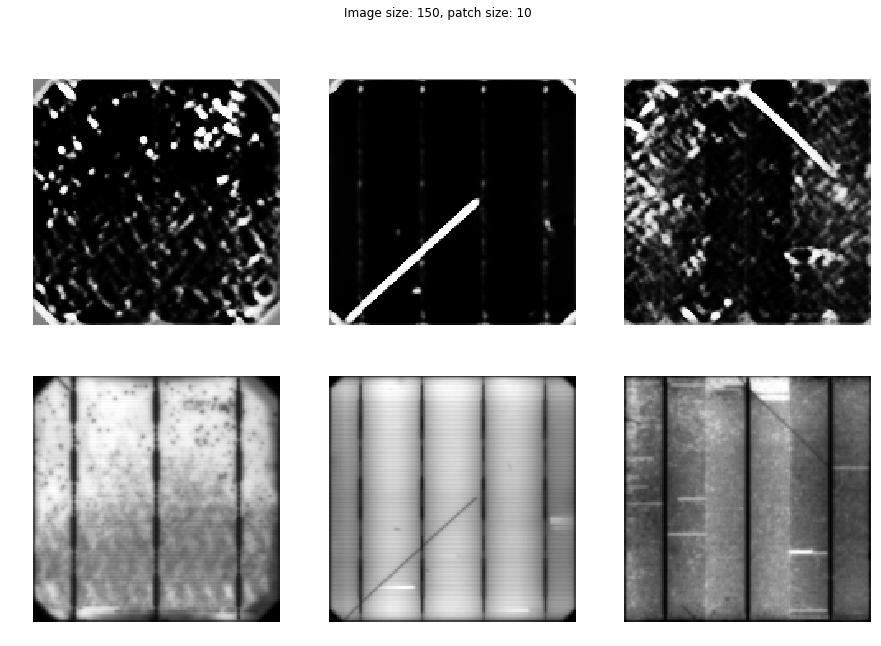

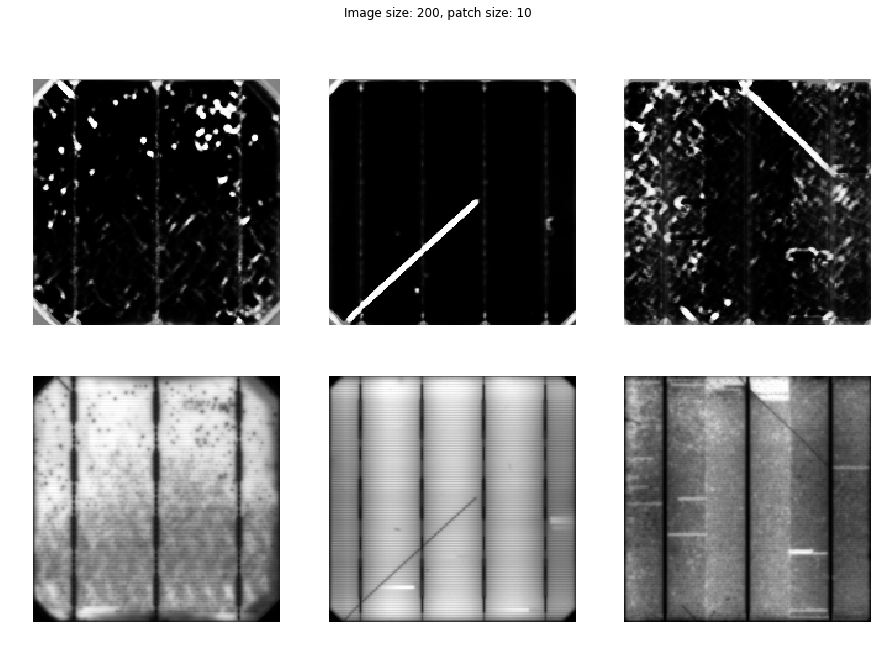

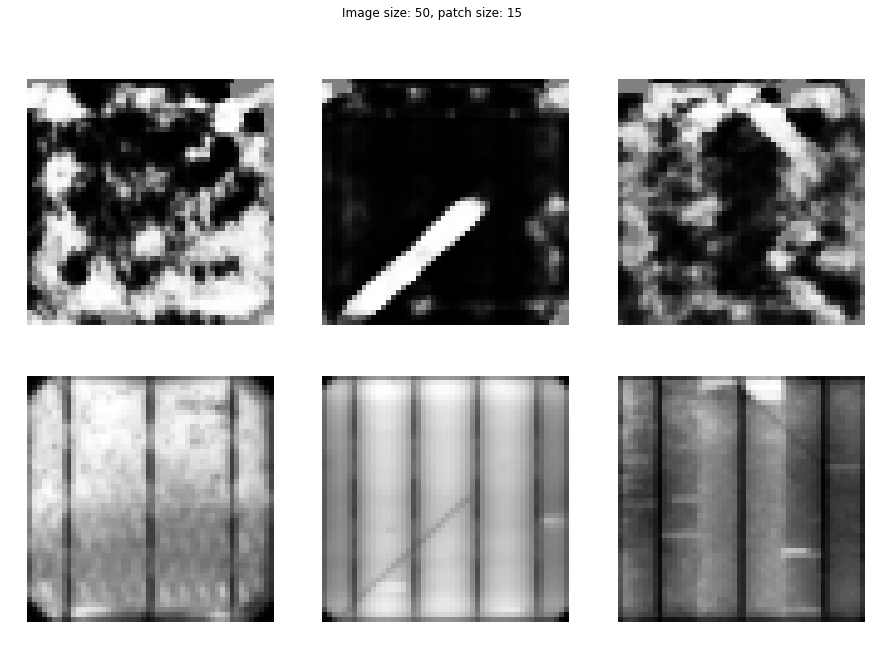

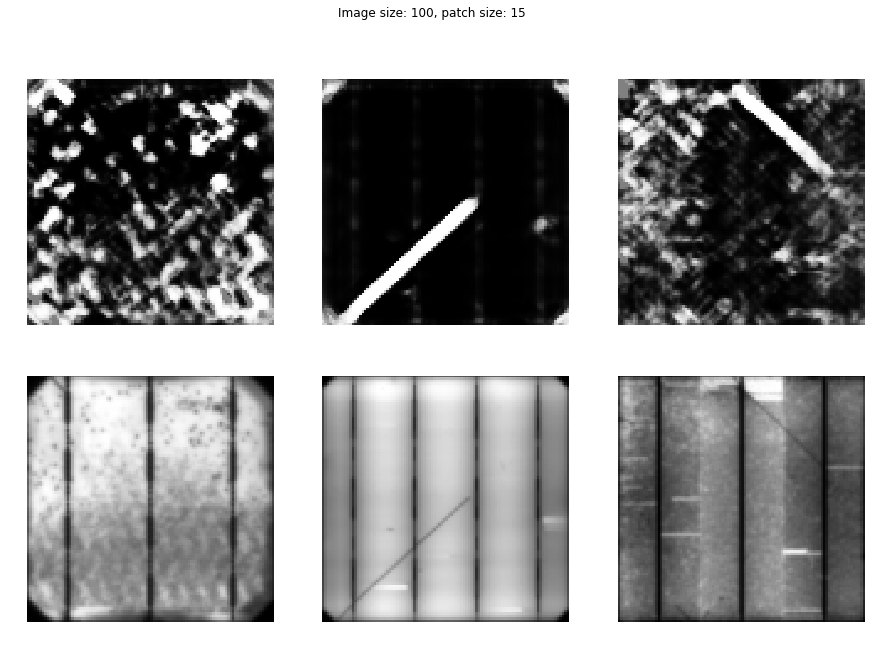

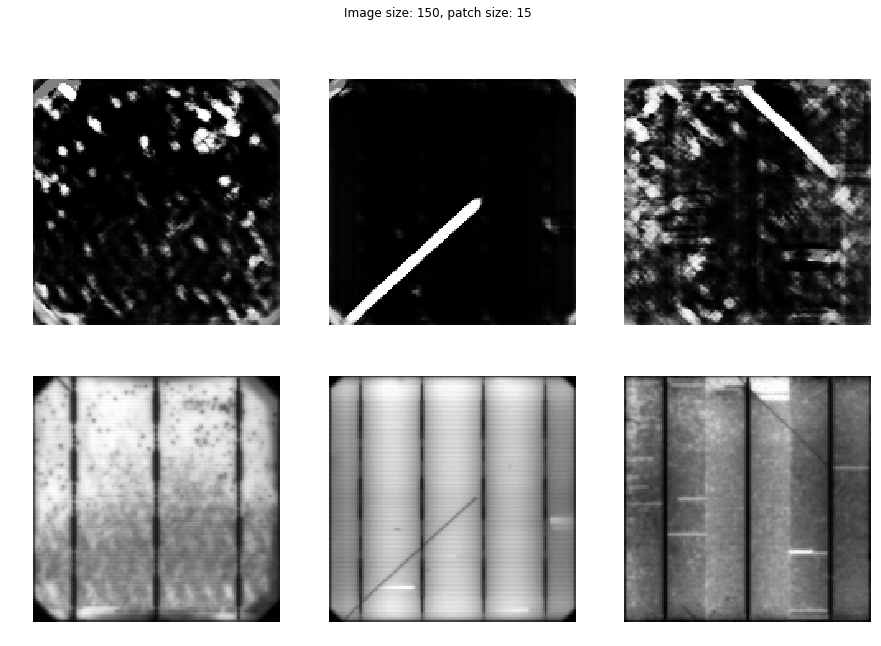

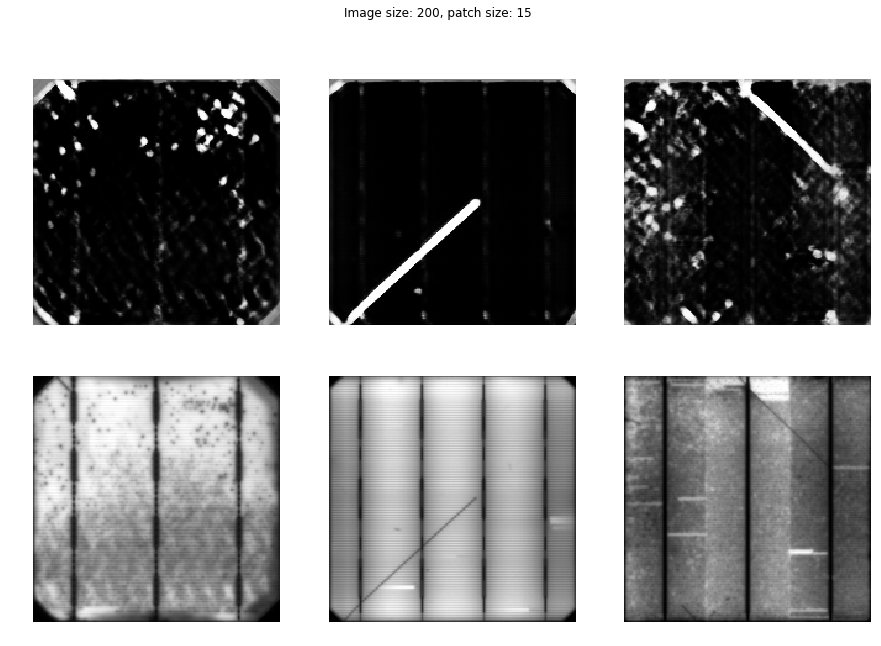

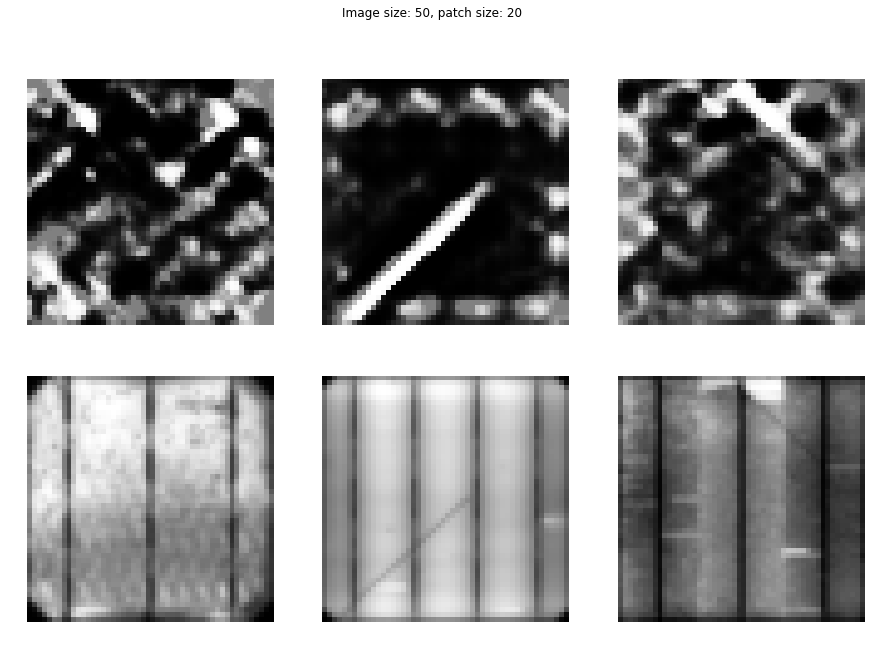

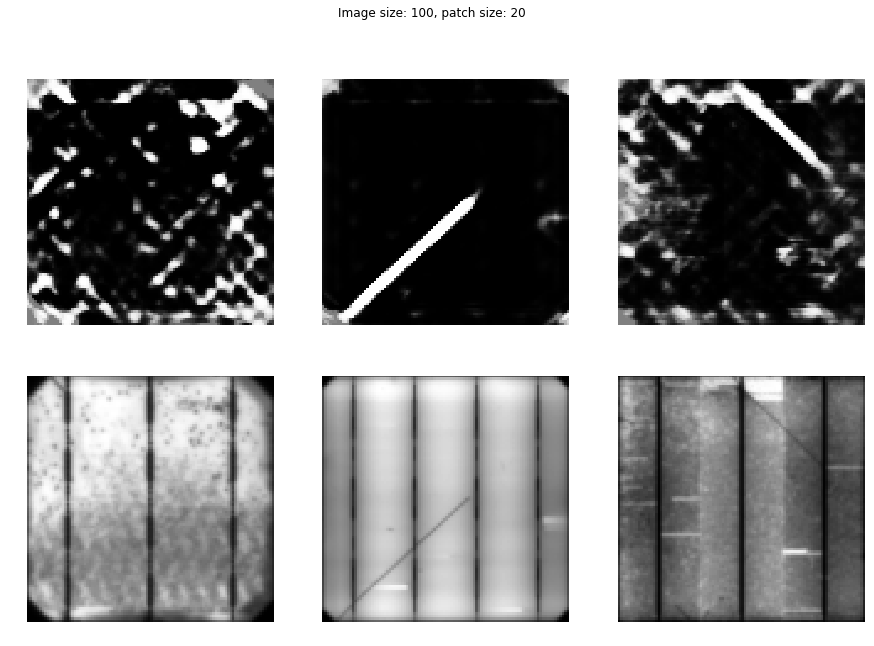

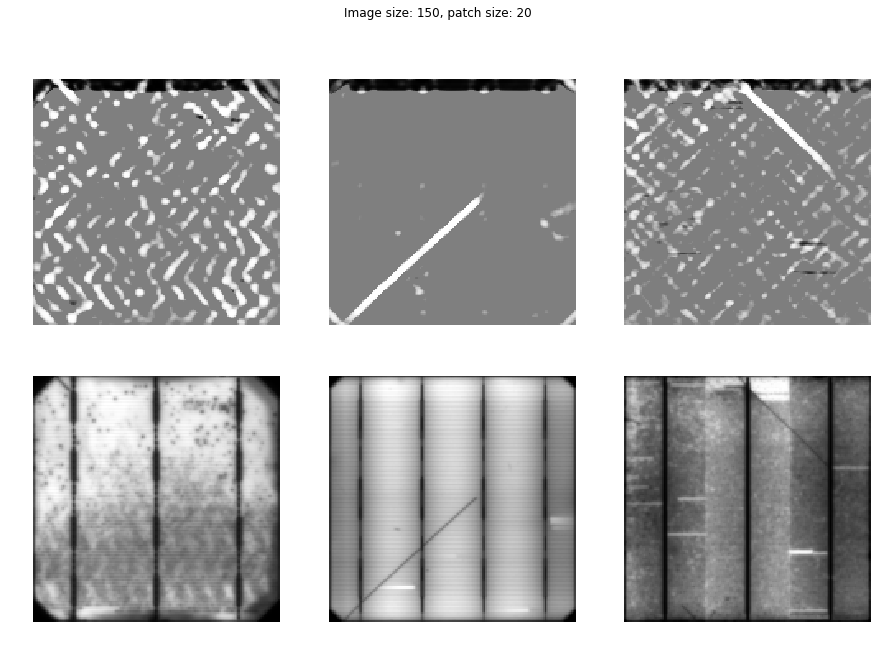

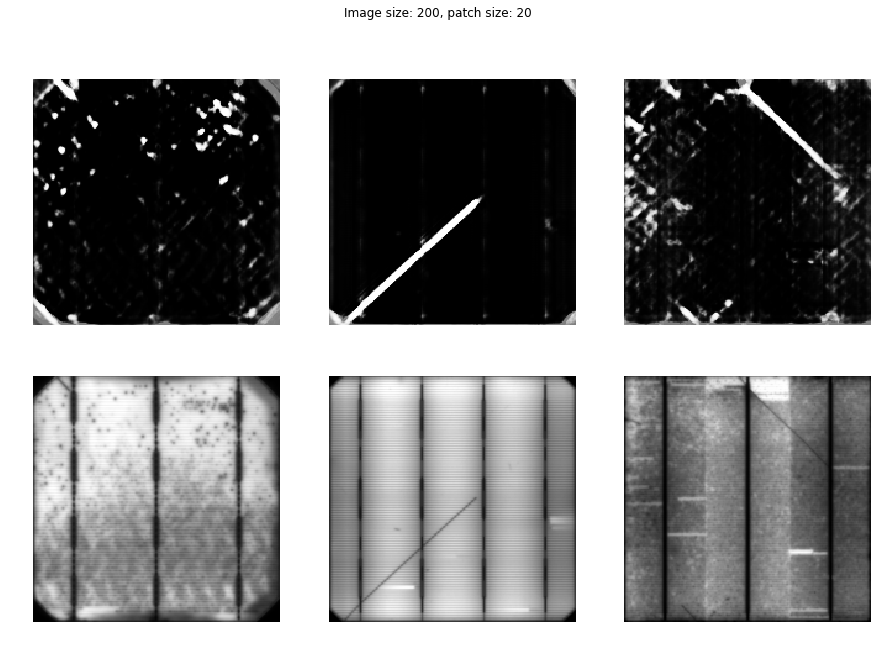

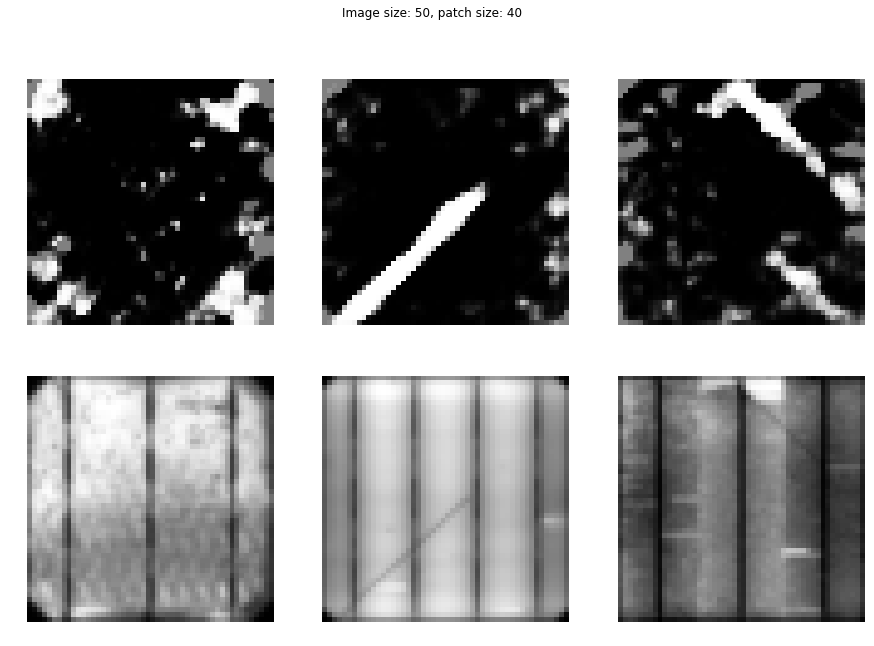

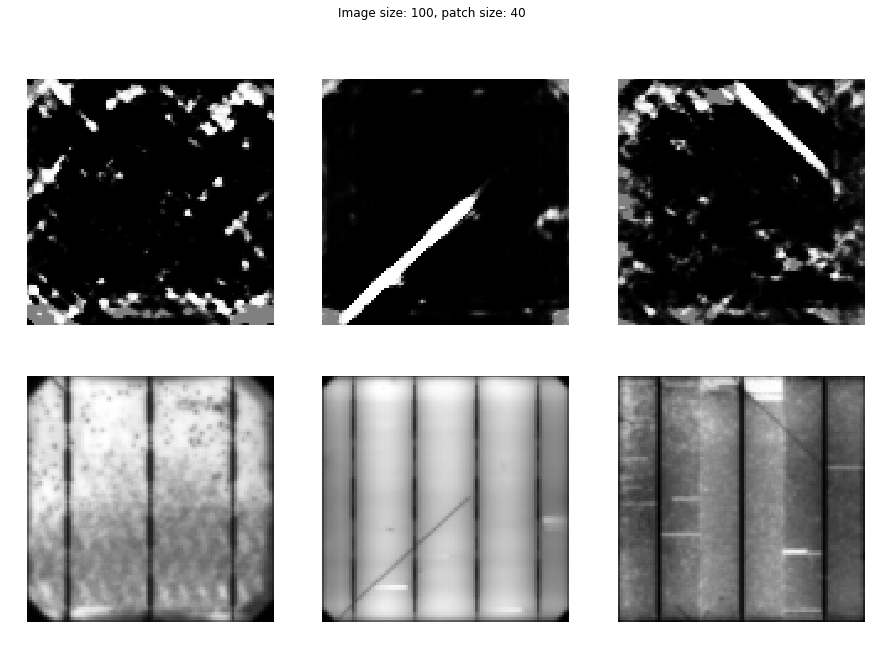

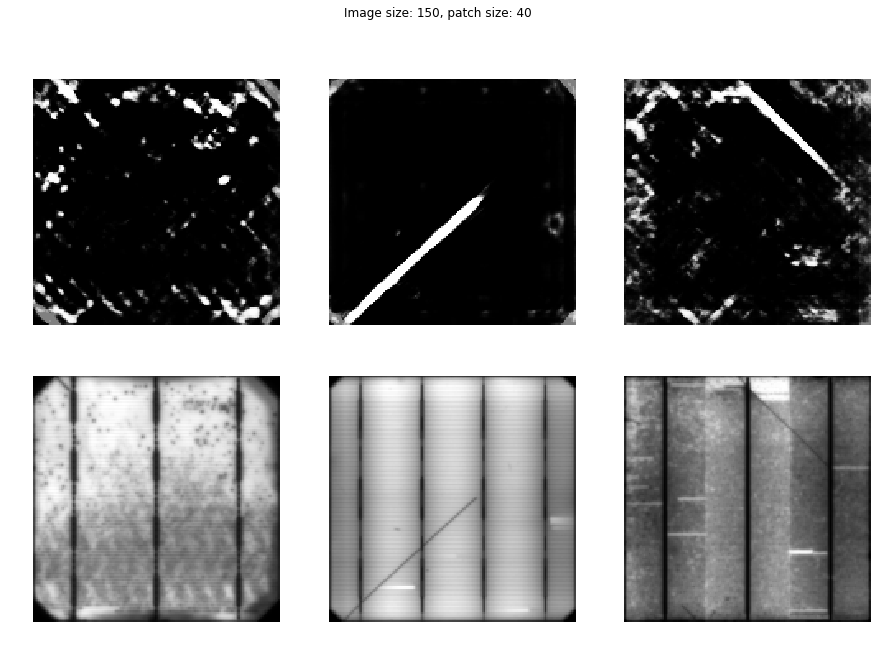

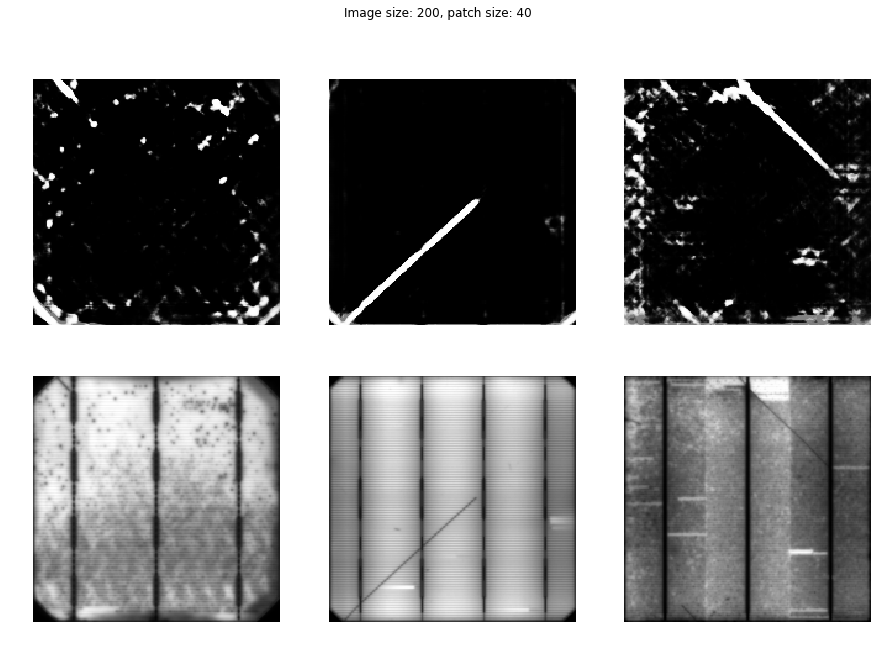

In [6]:
#if exists('./results/001_Patch_and_image_size'): rmtree('./results/001_Patch_and_image_size')
#makedirs('./results/001_Patch_and_image_size')

patch_sizes = [5, 10, 15, 20, 40]
image_sizes = [50, 100, 150, 200]

for patch_size in patch_sizes:
    for image_size in image_sizes:
        # Update the dictionary
        TF['summary_train'] = [] # We append to this in the graph
        TF['image_size']    = image_size
        TF['patch_size']    = patch_size
        TF['test_id']       = '001_Patch_and_image_size_image_'+str(image_size)+'_patch_'+str(patch_size) 
        # Resize to 200 x 200
        res_images, res_masks = classification.resize(images, masks, TF['image_size'])
        
        # Update the graph
        TF     = two_layer_convnet.model(TF)
        
        # Fit the model
        tester = classification.Tester(res_images, res_masks, TF)
        tester.fit_model()
        
        # Query the model
        res_query_images, res_query_masks = classification.resize(query_images, query_masks, TF['image_size'])
        predictions, query_masks = tester.query_model(res_query_images, res_query_masks)
        
        # Plot and save the predictions
        f, axs = plt.subplots(2, 3, figsize = (15, 10))
        for i, ax in enumerate(axs.flatten()):
            if i < 3:
                ax.imshow(predictions[i, :, :], cmap = 'gray')
                ax.axis('off')
            else:
                ax.imshow(res_query_images[np.floor(i-3).astype(int), :, :, 0], cmap = 'gray')
                ax.axis('off')
        f.suptitle('Image size: {}, patch size: {}'.format(TF['image_size'], TF['patch_size']))
        f.savefig('./results/001_Patch_and_image_size/image_{}_patch_{}.png'.format(TF['image_size'],
                                                                                    TF['patch_size']), dpi = 400)